[View in Colaboratory](https://colab.research.google.com/github/hadrizia/minicurso-analise-descritiva-dados-abertos/blob/master/CongressistasEDA.ipynb)

# Sobre Pandas

In [131]:
import pandas as pd

Biblioteca voltada para computação cinetífica que provê alta performace e facilidade para trabalhar com dados estruturados.
Seus principais tipos de dados são `Series` (Array indexado de uma dimensão) e `DataFrame` (Arrays indexados de duas dimensões)

In [132]:
exemplo_serie = {'b' : 1, 'a' : 0, 'c' : 2}
pd.Series(exemplo1)

a    0
b    1
c    2
dtype: int64

In [133]:
exemplo_df = {'col1': [3, 4, 5], 'col2': [3.2, 51., 7.], 'col3': ['texto', 'também', 'pode']}
pd.DataFrame(exemplo_df)

,col1,col2,col3
0,3,3.2,texto
1,4,51.0,também
2,5,7.0,pode


Links interessantes para estudar e tirar dúvidas: 
- [Cooknook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html)
- [10 minutos com Pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
- [Documentação](http://pandas.pydata.org/pandas-docs/stable/index.html)

# Perfil dos Congressistas em 2014 e 2018
** Autor: Hadrizia Santos** 

Nas eleições de 2018, o Senado Federal teve a maior renovação da história. Estima-se que a cada quatro senadores que tentaram a reeleição em 2018, apenas um conseguiu, acarretando em uma renovação de 85% do Senado. Esta informação pode gerar algumas perguntas sobre esta renovação: 
* Como se deu a renovação dos Deputados Federais da Câmara dos Deputados? 
* Qual é o perfil dos Congressistas que estão no poder hoje?
* Qual é o perfil dos Congressistas eleitos em 2018? Existe alguma melhoria na diversidade quanto à cor e ao gênero, por exemplo? 

Fonte dos dados analisados: [Repositório dados eleitorias TSE](http://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais)

In [134]:
import io
import requests

url = "https://raw.githubusercontent.com/hadrizia/minicurso-analise-descritiva-dados-abertos/master/data/congressistas-eleitos/eleicoes_2014_e_2018.csv"
s = requests.get(url).content
data = pd.read_csv(io.StringIO(s.decode('utf-8')))

### Brincando um pouco com as funções do Pandas

 * Head(n): Função que retorna as n primeiras linhas do dataset.

In [135]:
data.head()

,ano,sq_candidato,nome_candidato,descricao_cargo,sigla_partido,desc_sit_cand_tot,sigla_uf,total_votos,sexo,estado_civil,grau_instrucao,descricao_ocupacao,cor_raca,data_nascimento,descricao_nacionalidade
0,2014,10000000001,GLADSON DE LIMA CAMELI,SENADOR,PP,ELEITO,AC,218756,MASCULINO,CASADO(A),SUPERIOR COMPLETO,DEPUTADO,PARDA,26/03/1978,BRASILEIRA NATA
1,2014,10000000158,CARLOS CESAR CORREIA DE MESSIAS,DEPUTADO FEDERAL,PSB,ELEITO POR QP,AC,26448,MASCULINO,CASADO(A),ENSINO FUNDAMENTAL INCOMPLETO,OUTROS,PARDA,05/07/1958,BRASILEIRA NATA
2,2014,10000000163,LEONARDO CUNHA DE BRITO,DEPUTADO FEDERAL,PT,ELEITO POR QP,AC,20876,MASCULINO,CASADO(A),SUPERIOR COMPLETO,ADVOGADO,BRANCA,13/04/1979,BRASILEIRA NATA
3,2014,10000000166,RAIMUNDO ANGELIM VASCONCELOS,DEPUTADO FEDERAL,PT,ELEITO POR QP,AC,39844,MASCULINO,CASADO(A),SUPERIOR COMPLETO,PROFESSOR DE ENSINO SUPERIOR,BRANCA,19/02/1955,BRASILEIRA NATA
4,2014,10000000171,SEBASTIÃO SIBÁ MACHADO OLIVEIRA,DEPUTADO FEDERAL,PT,ELEITO POR QP,AC,18395,MASCULINO,CASADO(A),SUPERIOR COMPLETO,DEPUTADO,PARDA,24/01/1958,BRASILEIRA NATA


 - Filtrando dados:
 
Quantas mulheres foram eleitas para o senado em 2018?

In [136]:
len(data.loc[(data['ano'] ==  2018) & (data['sexo'] =='FEMININO') & (data['descricao_cargo'] == 'SENADOR')])

7

- Removendo coluna sq_candidato

In [137]:
data = data.drop('sq_candidato', axis=1)
data.head()

,ano,nome_candidato,descricao_cargo,sigla_partido,desc_sit_cand_tot,sigla_uf,total_votos,sexo,estado_civil,grau_instrucao,descricao_ocupacao,cor_raca,data_nascimento,descricao_nacionalidade
0,2014,GLADSON DE LIMA CAMELI,SENADOR,PP,ELEITO,AC,218756,MASCULINO,CASADO(A),SUPERIOR COMPLETO,DEPUTADO,PARDA,26/03/1978,BRASILEIRA NATA
1,2014,CARLOS CESAR CORREIA DE MESSIAS,DEPUTADO FEDERAL,PSB,ELEITO POR QP,AC,26448,MASCULINO,CASADO(A),ENSINO FUNDAMENTAL INCOMPLETO,OUTROS,PARDA,05/07/1958,BRASILEIRA NATA
2,2014,LEONARDO CUNHA DE BRITO,DEPUTADO FEDERAL,PT,ELEITO POR QP,AC,20876,MASCULINO,CASADO(A),SUPERIOR COMPLETO,ADVOGADO,BRANCA,13/04/1979,BRASILEIRA NATA
3,2014,RAIMUNDO ANGELIM VASCONCELOS,DEPUTADO FEDERAL,PT,ELEITO POR QP,AC,39844,MASCULINO,CASADO(A),SUPERIOR COMPLETO,PROFESSOR DE ENSINO SUPERIOR,BRANCA,19/02/1955,BRASILEIRA NATA
4,2014,SEBASTIÃO SIBÁ MACHADO OLIVEIRA,DEPUTADO FEDERAL,PT,ELEITO POR QP,AC,18395,MASCULINO,CASADO(A),SUPERIOR COMPLETO,DEPUTADO,PARDA,24/01/1958,BRASILEIRA NATA


- Contando o número de mulheres eleitas por ano de eleição, partido e cargo

In [138]:
data.loc[data['sexo'] == 'FEMININO'].groupby(['ano', 
                                              'sigla_partido', 
                                              'descricao_cargo', 
                                              'sexo'])\
.size().reset_index(name='count').sort_values(['count', 'sigla_partido', 'ano'], ascending=False)

,ano,sigla_partido,descricao_cargo,sexo,count
44,2018,PT,DEPUTADO FEDERAL,FEMININO,10
14,2014,PT,DEPUTADO FEDERAL,FEMININO,9
41,2018,PSL,DEPUTADO FEDERAL,FEMININO,9
39,2018,PSDB,DEPUTADO FEDERAL,FEMININO,8
4,2014,PMDB,DEPUTADO FEDERAL,FEMININO,7
32,2018,PR,DEPUTADO FEDERAL,FEMININO,6
43,2018,PSOL,DEPUTADO FEDERAL,FEMININO,5
13,2014,PSDB,DEPUTADO FEDERAL,FEMININO,5
11,2014,PSB,DEPUTADO FEDERAL,FEMININO,5
28,2018,PP,DEPUTADO FEDERAL,FEMININO,5


- Congressistas com maiores números de votos

In [139]:
data.filter(items = ['ano', 
                     'nome_candidato', 
                     'descricao_cargo', 
                     'sigla_uf', 
                     'total_votos']).sort_values(['total_votos'], ascending = False).head(10)

,ano,nome_candidato,descricao_cargo,sigla_uf,total_votos
508,2014,JOSÉ SERRA,SENADOR,SP,11105874
1069,2018,SERGIO OLIMPIO GOMES,SENADOR,SP,9039717
1048,2018,MARA CRISTINA GABRILLI,SENADOR,SP,6513282
227,2014,ANTONIO AUGUSTO JUNHO ANASTASIA,SENADOR,MG,5102987
340,2014,ROMÁRIO DE SOUZA FARIA,SENADOR,RJ,4683963
924,2018,FLÁVIO NANTES BOLSONARO,SENADOR,RJ,4380418
588,2018,JAQUES WAGNER,SENADOR,BA,4253331
280,2014,ALVARO FERNANDES DIAS,SENADOR,PR,4101848
589,2018,ANGELO MARIO CORONEL DE AZEVEDO MARTINS,SENADOR,BA,3927598
729,2018,RODRIGO OTÁVIO SOARES PACHECO,SENADOR,MG,3616864


## 1. Como se deu a renovação dos Deputados Federais na Câmara dos Deputados?

### Quantidade de deputados federais eleitos em 2018

In [140]:
deputados_2018 = data.loc[(data['ano'] == 2018) & (data['descricao_cargo'] == 'DEPUTADO FEDERAL')]
deputados_2018.head()

,ano,nome_candidato,descricao_cargo,sigla_partido,desc_sit_cand_tot,sigla_uf,total_votos,sexo,estado_civil,grau_instrucao,descricao_ocupacao,cor_raca,data_nascimento,descricao_nacionalidade
540,2018,MANUEL MARCOS CARVALHO DE MESQUITA,DEPUTADO FEDERAL,PRB,ELEITO POR MÉDIA,AC,7489,MASCULINO,CASADO(A),ENSINO MÉDIO COMPLETO,VEREADOR,PARDA,07/05/1972,BRASILEIRA NATA
541,2018,JESUS SERGIO DE MENEZES,DEPUTADO FEDERAL,PDT,ELEITO POR MÉDIA,AC,9537,MASCULINO,CASADO(A),SUPERIOR COMPLETO,PROFESSOR DE ENSINO MÉDIO,PARDA,10/06/1973,BRASILEIRA NATA
542,2018,ALAN RICK MIRANDA,DEPUTADO FEDERAL,DEM,ELEITO POR QP,AC,22263,MASCULINO,CASADO(A),SUPERIOR COMPLETO,DEPUTADO,BRANCA,23/10/1976,BRASILEIRA NATA
543,2018,CYLMARA FERNANDES DA ROCHA GRIPP,DEPUTADO FEDERAL,PSDB,ELEITO POR QP,AC,40047,FEMININO,CASADO(A),SUPERIOR COMPLETO,EMPRESÁRIO,BRANCA,04/09/1973,BRASILEIRA NATA
544,2018,FLAVIANO FLAVIO BAPTISTA DE MELO,DEPUTADO FEDERAL,MDB,ELEITO POR MÉDIA,AC,18723,MASCULINO,DIVORCIADO(A),SUPERIOR COMPLETO,DEPUTADO,BRANCA,17/11/1949,BRASILEIRA NATA


In [141]:
quantidade_deputados_2018 = len(deputados_2018)
print('Número de deputados eleitos em 2018: {}'.format(quantidade_deputados_2018))

Número de deputados eleitos em 2018: 513


### Quantidade de deputados que se reelegeram em 2018

In [142]:
deputados_reeleitos_2018 = data.loc[(data['ano'] == 2018) 
                                    & (data['descricao_cargo'] == 'DEPUTADO FEDERAL') 
                                    & (data['descricao_ocupacao'] == 'DEPUTADO')]
deputados_reeleitos_2018.head()

,ano,nome_candidato,descricao_cargo,sigla_partido,desc_sit_cand_tot,sigla_uf,total_votos,sexo,estado_civil,grau_instrucao,descricao_ocupacao,cor_raca,data_nascimento,descricao_nacionalidade
542,2018,ALAN RICK MIRANDA,DEPUTADO FEDERAL,DEM,ELEITO POR QP,AC,22263,MASCULINO,CASADO(A),SUPERIOR COMPLETO,DEPUTADO,BRANCA,23/10/1976,BRASILEIRA NATA
544,2018,FLAVIANO FLAVIO BAPTISTA DE MELO,DEPUTADO FEDERAL,MDB,ELEITO POR MÉDIA,AC,18723,MASCULINO,DIVORCIADO(A),SUPERIOR COMPLETO,DEPUTADO,BRANCA,17/11/1949,BRASILEIRA NATA
545,2018,JESSICA ROJAS SALES,DEPUTADO FEDERAL,MDB,ELEITO POR QP,AC,28717,FEMININO,SOLTEIRO(A),SUPERIOR COMPLETO,DEPUTADO,PARDA,28/11/1980,BRASILEIRA NATA
551,2018,ARTHUR CESAR PEREIRA DE LIRA,DEPUTADO FEDERAL,PP,ELEITO POR QP,AL,143858,MASCULINO,CASADO(A),SUPERIOR COMPLETO,DEPUTADO,PARDA,25/06/1969,BRASILEIRA NATA
552,2018,JOÃO HENRIQUE HOLANDA CALDAS,DEPUTADO FEDERAL,PSB,ELEITO POR QP,AL,178645,MASCULINO,SOLTEIRO(A),SUPERIOR COMPLETO,DEPUTADO,PARDA,22/07/1987,BRASILEIRA NATA


In [143]:
quantidade_deputados_reeleitos_2018 = len(deputados_reeleitos_2018)
print('Número de deputados reeleitos em 2018: {}'.format(quantidade_deputados_reeleitos_2018))

Número de deputados reeleitos em 2018: 236


### Taxa de renovacao

In [144]:
taxa_renovacao_camara = quantidade_deputados_reeleitos_2018 / float(quantidade_deputados_2018)
print('Taxa de renovação: {:.2f}'.format(taxa_renovacao_camara))

Taxa de renovação: 0.46


## 2. Qual é o perfil dos Congressistas que estão no poder hoje?

Considerando os aspectos: sexo e cor_raca

In [145]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('fivethirtyeight')

plt.rcdefaults()

congressistas_2014 = data.loc[data['ano'] == 2014]
perfil_congressistas_2014 = congressistas_2014.groupby(['cor_raca', 'sexo']).size().reset_index(name='count')

perfil_congressistas_2014

,cor_raca,sexo,count
0,BRANCA,FEMININO,45
1,BRANCA,MASCULINO,388
2,PARDA,FEMININO,8
3,PARDA,MASCULINO,78
4,PRETA,FEMININO,3
5,PRETA,MASCULINO,18


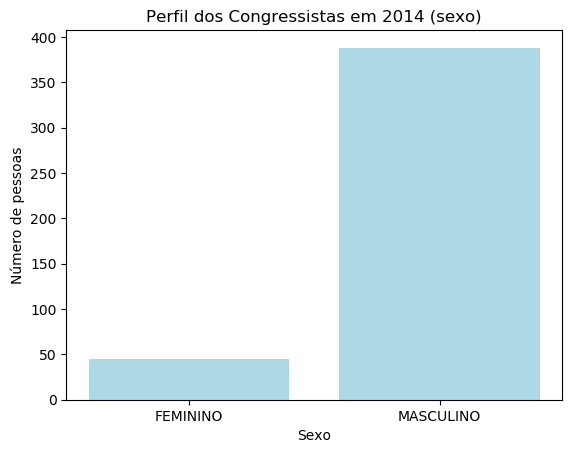

In [146]:
fig, ax = plt.subplots()
ax.bar(perfil_congressistas_2014['sexo'], 
       perfil_congressistas_2014['count'], 
       color='lightblue', linewidth=3)

ax.set(title='Perfil dos Congressistas em 2014 (sexo)', ylabel='Número de pessoas', xlabel='Sexo')

plt.show()

### Separando deputados de senadores

In [147]:
deputados = congressistas_2014.loc[congressistas_2014['descricao_cargo'] == 'DEPUTADO FEDERAL']
senadores = congressistas_2014.loc[congressistas_2014['descricao_cargo'] == 'SENADOR']

deputados.groupby(['cor_raca', 'sexo']).size().reset_index(name='count')

,cor_raca,sexo,count
0,BRANCA,FEMININO,41
1,BRANCA,MASCULINO,370
2,PARDA,FEMININO,7
3,PARDA,MASCULINO,74
4,PRETA,FEMININO,3
5,PRETA,MASCULINO,18


In [148]:
senadores.groupby(['cor_raca', 'sexo']).size().reset_index(name='count')

,cor_raca,sexo,count
0,BRANCA,FEMININO,4
1,BRANCA,MASCULINO,18
2,PARDA,FEMININO,1
3,PARDA,MASCULINO,4


In [149]:
# Pegando os valores possíveis de cor_raca
uniq = list(set(data['sexo']))

# Definindo paleta de cores
palette = plt.get_cmap('Set2') # Paletas disponíveis: https://matplotlib.org/gallery/color/colormap_reference.html

# Fazendo a cor casar com o número de valores de raça
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=palette)

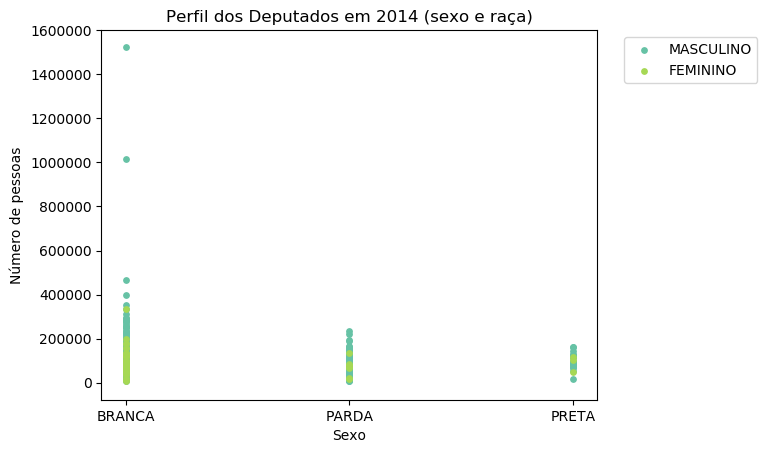

In [150]:
## PLOTANDO DEPUTADOS

fig, ax = plt.subplots()

# Plot cada raça
for i in range(len(uniq)):
    indx = deputados['sexo'] == uniq[i]
    ax.scatter(deputados['cor_raca'][indx], deputados['total_votos'][indx], s=15, color=scalarMap.to_rgba(i), label=uniq[i])

ax.set(title='Perfil dos Deputados em 2014 (sexo e raça)', ylabel='Número de pessoas', xlabel='Sexo') 
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")    
plt.show()

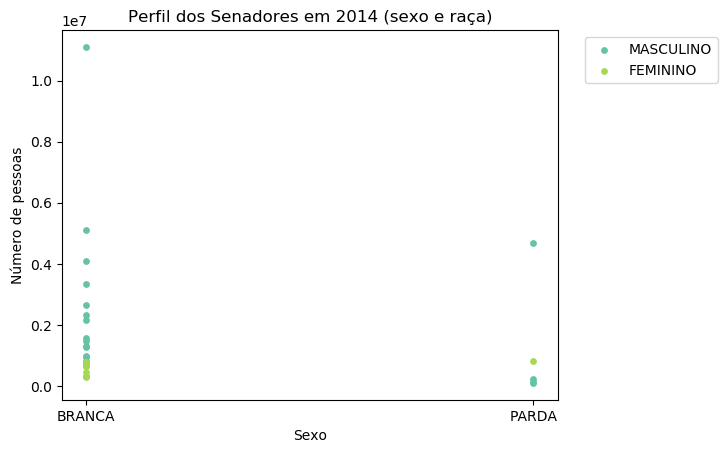

In [151]:
## PLOTANDO SENADORES

fig, ax = plt.subplots()

# Plot cada raça
for i in range(len(uniq)):
    indx = senadores['sexo'] == uniq[i]
    ax.scatter(senadores['cor_raca'][indx], senadores['total_votos'][indx], s=15, color=scalarMap.to_rgba(i), label=uniq[i])
    
ax.set(title='Perfil dos Senadores em 2014 (sexo e raça)', ylabel='Número de pessoas', xlabel='Sexo')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

## 3. Qual é o perfil dos Congressistas eleitos em 2018? Existe alguma melhoria na diversidade quanto à cor, nacionalidade e ao gênero, por exemplo? 

In [152]:
congressistas_2018 = data.loc[data['ano'] == 2018]

# Separando deputados de senadores
deputados = congressistas_2018.loc[congressistas_2018['descricao_cargo'] == 'DEPUTADO FEDERAL']
senadores = congressistas_2018.loc[congressistas_2018['descricao_cargo'] == 'SENADOR']

In [153]:
deputados.groupby(['cor_raca', 'sexo']).size().reset_index(name='count')

,cor_raca,sexo,count
0,AMARELA,MASCULINO,2
1,BRANCA,FEMININO,63
2,BRANCA,MASCULINO,322
3,INDÍGENA,FEMININO,1
4,PARDA,FEMININO,9
5,PARDA,MASCULINO,95
6,PRETA,FEMININO,4
7,PRETA,MASCULINO,17


In [154]:
senadores.groupby(['cor_raca', 'sexo']).size().reset_index(name='count')

,cor_raca,sexo,count
0,BRANCA,FEMININO,6
1,BRANCA,MASCULINO,34
2,PARDA,FEMININO,1
3,PARDA,MASCULINO,10
4,PRETA,MASCULINO,3


In [155]:
## PLOTANDO DEPUTADOS

fig, ax = plt.subplots()

# Plot cada raça
for i in range(len(uniq)):
    indx = deputados['sexo'] == uniq[i]
    ax.scatter(deputados['cor_raca'][indx], deputados['total_votos'][indx], s=15, color=scalarMap.to_rgba(i), label=uniq[i])

ax.set(title='Perfil dos Deputados em 2014 (sexo e raça)', ylabel='Número de pessoas', xlabel='Sexo') 
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")    
plt.show()

ValueError: could not convert string to float: 'INDÍGENA'

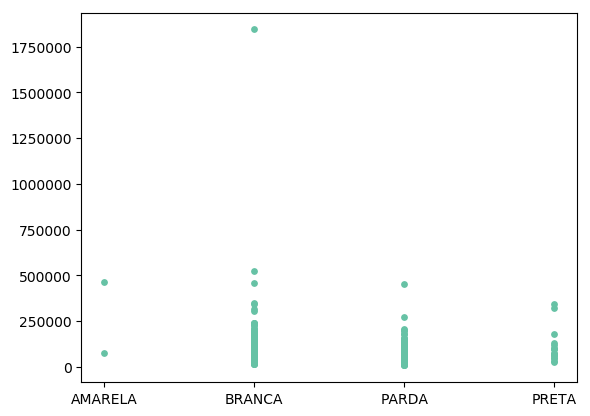

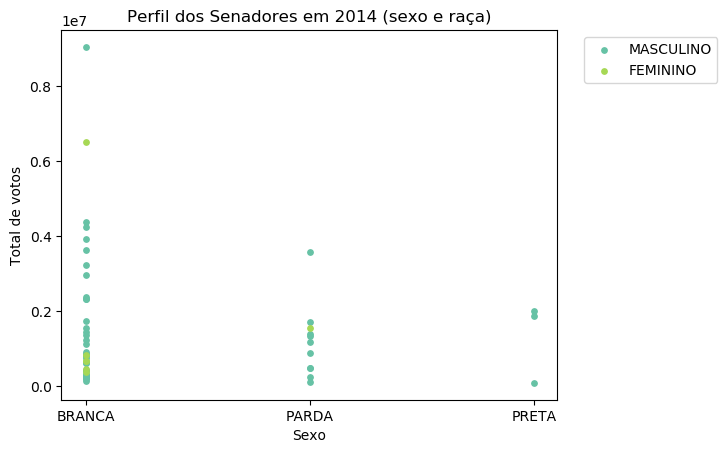

In [156]:
## PLOTANDO SENADORES

fig, ax = plt.subplots()

# Plot cada raça
for i in range(len(uniq)):
    indx = senadores['sexo'] == uniq[i]
    ax.scatter(senadores['cor_raca'][indx], senadores['total_votos'][indx], s=15, color=scalarMap.to_rgba(i), label=uniq[i])
    
ax.set(title='Perfil dos Senadores em 2014 (sexo e raça)', ylabel='Total de votos', xlabel='Sexo')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

# Como será a representação por Estado? Será que a representatividade melhora aqui na Paraíba?
mãos a obra!